# Library

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn import datasets, svm, metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%matplotlib inline

# Dataset

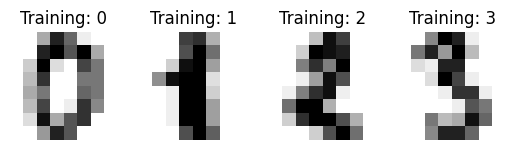

In [34]:
# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Training: %i" % label)



In [38]:
test_size = 0.2
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
target = digits.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size)

print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (1437, 64) (1437,)
Dữ liệu testing =  (360, 64) (360,)


In [39]:
model = svm.SVC(kernel="linear", C=1.0)
model.fit(X_train, y_train)


SVC(kernel='linear')

In [41]:
y_pred = model.predict(X_test)
print("Acc: {}".format(accuracy_score(y_test, y_pred)))

Acc: 0.9805555555555555


# Sử dụng Grid Search

In [42]:
params_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.0001, 0.001, 0.01, 0.1], "kernel": ["linear", "rbf", "poly"]}

model = svm.SVC()
best_model = GridSearchCV(model, params_grid, cv=4, n_jobs=-1, scoring="accuracy")

best_model.fit(X_train, y_train)

print(best_model.best_params_)
print(best_model.best_estimator_)

print("Testing")
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)
Testing
0.9944444444444445


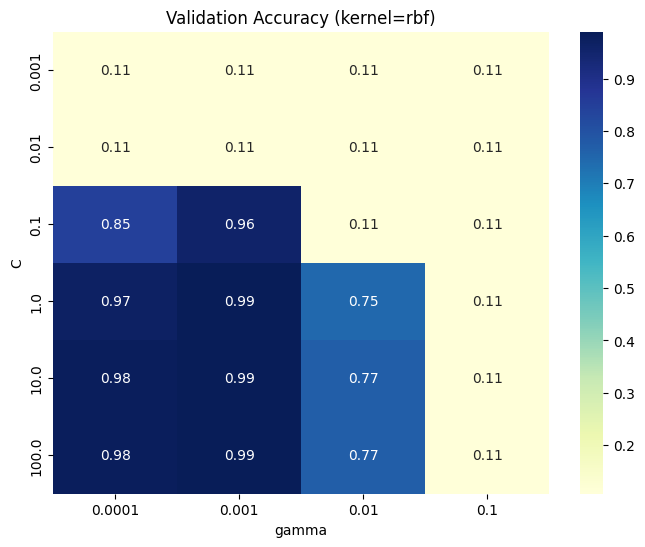

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame(best_model.cv_results_)

rbf_results = results[results['param_kernel'] == 'rbf']

pivot_table = rbf_results.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Validation Accuracy (kernel=rbf)")
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

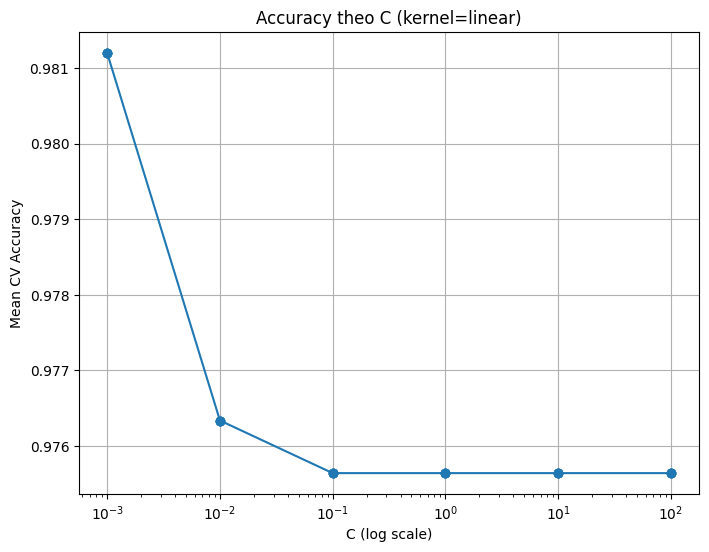

In [45]:
linear_results = results[results['param_kernel'] == 'linear']

plt.figure(figsize=(8,6))
plt.plot(linear_results["param_C"], linear_results["mean_test_score"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Mean CV Accuracy")
plt.title("Accuracy theo C (kernel=linear)")
plt.grid(True)
plt.show()
